In [1]:
# Importing required libraries
from keras.datasets import imdb
from numpy.core.fromnumeric import ndim
from keras import models
from keras import layers
(train_data, train_labels), (test_data , test_labels) =  imdb.load_data(num_words = 10000)
import matplotlib.pyplot as plt


In [3]:
# Performing one hot encoding to get equal shape for all samples
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


In [4]:
# Creating Validation set
x_val=x_train[:10000]
partial_x_train=x_train[10000:]
y_val=y_train[:10000]
partial_y_train = y_train[10000:]


In [5]:
# Creating and running the model for training and validation set
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Original= model.fit(partial_x_train,partial_y_train,epochs=20, batch_size=512, validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 3s 74ms/step - loss: 0.5150 - acc: 0.7707 - val_loss: 0.3780 - val_acc: 0.8665
Epoch 2/20
30/30 [==============================] - 1s 40ms/step - loss: 0.3086 - acc: 0.8993 - val_loss: 0.3082 - val_acc: 0.8836
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2335 - acc: 0.9207 - val_loss: 0.2794 - val_acc: 0.8903
Epoch 4/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1844 - acc: 0.9403 - val_loss: 0.2957 - val_acc: 0.8827
Epoch 5/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1554 - acc: 0.9498 - val_loss: 0.2925 - val_acc: 0.8820
Epoch 6/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1328 - acc: 0.9569 - val_loss: 0.2856 - val_acc: 0.8844
Epoch 7/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1099 - acc: 0.9676 - val_loss: 0.3034 - val_acc: 0.8861
Epoch 8/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0954 - a

In [6]:
# Runnnig the model again for epochs = 4 as it has high validation accuracy
model= models.Sequential()
model.add(layers.Dense(16, activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Actual=model.fit(x_train,y_train,epochs=4,batch_size=512)

Epoch 1/4
49/49 [==============================] - 2s 26ms/step - loss: 0.5049 - accuracy: 0.7972
Epoch 2/4
49/49 [==============================] - 1s 26ms/step - loss: 0.2998 - accuracy: 0.9006
Epoch 3/4
49/49 [==============================] - 1s 26ms/step - loss: 0.2273 - accuracy: 0.9208
Epoch 4/4
49/49 [==============================] - 1s 25ms/step - loss: 0.1919 - accuracy: 0.9320


In [12]:
# Creating a model to check the accuracy for Increased the layers
model= models.Sequential()
model.add(layers.Dense(16, activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

IncreasedLayer=model.fit(x_train,y_train,epochs=4,batch_size=512)

Epoch 1/4
49/49 [==============================] - 2s 26ms/step - loss: 0.4845 - accuracy: 0.8063
Epoch 2/4
49/49 [==============================] - 2s 33ms/step - loss: 0.2708 - accuracy: 0.9022
Epoch 3/4
49/49 [==============================] - 2s 39ms/step - loss: 0.2110 - accuracy: 0.9215
Epoch 4/4
49/49 [==============================] - 1s 25ms/step - loss: 0.1750 - accuracy: 0.9375


In [13]:
# Creating a model to check the accuracy for decreased the layers
model= models.Sequential()
model.add(layers.Dense(16, activation='relu',input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

DecreasedLayer=model.fit(x_train,y_train,epochs=4,batch_size=512)

Epoch 1/4
49/49 [==============================] - 2s 28ms/step - loss: 0.4720 - accuracy: 0.8209
Epoch 2/4
49/49 [==============================] - 1s 30ms/step - loss: 0.3056 - accuracy: 0.8971
Epoch 3/4
49/49 [==============================] - 2s 34ms/step - loss: 0.2473 - accuracy: 0.9144
Epoch 4/4
49/49 [==============================] - 1s 30ms/step - loss: 0.2150 - accuracy: 0.9243


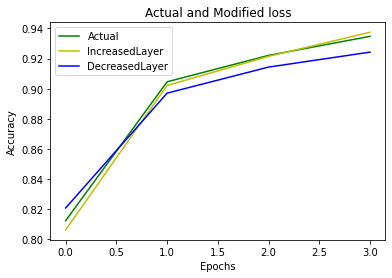

In [14]:
# Plotting the accuracy for Actual, Increased layers and Decreased layers 
Acc_Actual = Actual.history['accuracy']
Acc_IncreasedLayer = IncreasedLayer.history['accuracy']
Acc_DecreasedLayer = DecreasedLayer.history['accuracy']
epochs = range(0,4)
plt.plot(epochs, Acc_Actual, 'g', label='Actual')
plt.plot(epochs, Acc_IncreasedLayer, 'y', label='IncreasedLayer')
plt.plot(epochs, Acc_DecreasedLayer, 'b', label='DecreasedLayer')
plt.title('Actual and Modified loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [15]:
# Creating a model to check the accuracy for 64 units
model= models.Sequential()
model.add(layers.Dense(64, activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Units64=model.fit(x_train,y_train,epochs=4,batch_size=512)

Epoch 1/4
49/49 [==============================] - 3s 41ms/step - loss: 0.4359 - accuracy: 0.8110
Epoch 2/4
49/49 [==============================] - 2s 41ms/step - loss: 0.2650 - accuracy: 0.8984
Epoch 3/4
49/49 [==============================] - 2s 41ms/step - loss: 0.2086 - accuracy: 0.9212
Epoch 4/4
49/49 [==============================] - 2s 45ms/step - loss: 0.1789 - accuracy: 0.9315


In [16]:
# Creating a model to check the accuracy for 32 units
model= models.Sequential()
model.add(layers.Dense(32, activation='relu',input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Units32=model.fit(x_train,y_train,epochs=4,batch_size=512)

Epoch 1/4
49/49 [==============================] - 2s 30ms/step - loss: 0.4437 - accuracy: 0.8140
Epoch 2/4
49/49 [==============================] - 1s 30ms/step - loss: 0.2631 - accuracy: 0.8996
Epoch 3/4
49/49 [==============================] - 1s 30ms/step - loss: 0.2136 - accuracy: 0.9182
Epoch 4/4
49/49 [==============================] - 1s 29ms/step - loss: 0.1803 - accuracy: 0.9321


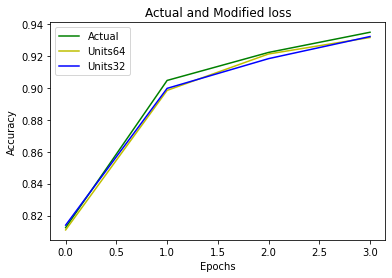

In [17]:
# Plotting the accuracy for Actual(16 units), 64  and 32 units
Acc_Actual = Actual.history['accuracy']
Acc_Units64 = Units64.history['accuracy']
Acc_Units32 = Units32.history['accuracy']
epochs = range(0,4)
plt.plot(epochs, Acc_Actual, 'g', label='Actual')
plt.plot(epochs, Acc_Units64, 'y', label='Units64')
plt.plot(epochs, Acc_Units32, 'b', label='Units32')
plt.title('Actual and Modified loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [18]:
# Creating a model to check the accuracy for mse loss function
model= models.Sequential()
model.add(layers.Dense(16, activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

loss_mse=model.fit(x_train,y_train,epochs=4,batch_size=512)

Epoch 1/4
49/49 [==============================] - 2s 25ms/step - loss: 0.1618 - accuracy: 0.8055
Epoch 2/4
49/49 [==============================] - 1s 25ms/step - loss: 0.0916 - accuracy: 0.8919
Epoch 3/4
49/49 [==============================] - 1s 24ms/step - loss: 0.0716 - accuracy: 0.9140
Epoch 4/4
49/49 [==============================] - 1s 24ms/step - loss: 0.0611 - accuracy: 0.9274


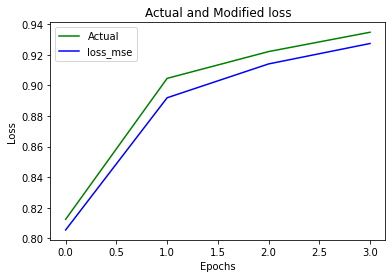

In [19]:
# Plotting the accuracy for Actual(binominal crossentropy) and mse loss function
loss_Actual = Actual.history['accuracy']
loss_mse = loss_mse.history['accuracy']
epochs = range(0,4)
plt.plot(epochs, loss_Actual, 'g', label='Actual')
plt.plot(epochs, loss_mse, 'b', label='loss_mse')
plt.title('Actual and Modified loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [7]:
# Creating a model to check the accuracy for tanh activation function
model= models.Sequential()
model.add(layers.Dense(16, activation='tanh',input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

tanh_activation=model.fit(x_train,y_train,epochs=4,batch_size=512)

Epoch 1/4
49/49 [==============================] - 2s 27ms/step - loss: 0.4259 - accuracy: 0.8244
Epoch 2/4
49/49 [==============================] - 1s 26ms/step - loss: 0.2442 - accuracy: 0.9086
Epoch 3/4
49/49 [==============================] - 1s 25ms/step - loss: 0.1896 - accuracy: 0.9298
Epoch 4/4
49/49 [==============================] - 1s 25ms/step - loss: 0.1601 - accuracy: 0.9412


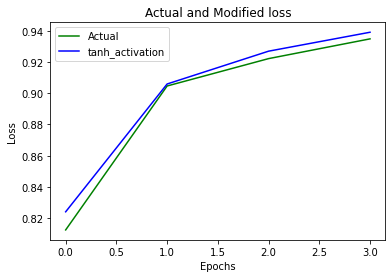

In [21]:
# Plotting the accuracy for Actual(relu activation function) and tanh activaiton function
loss_Actual = Actual.history['accuracy']
loss_tanh_activation = tanh_activation.history['accuracy']
epochs = range(0,4)
plt.plot(epochs, loss_Actual, 'g', label='Actual')
plt.plot(epochs, loss_tanh_activation, 'b', label='tanh_activation')
plt.title('Actual and Modified loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [15]:
# Creating a model to check the validation loss for l2 regularisation technique
from keras import regularizers
model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

L2_Regularizer=model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 2s 60ms/step - loss: 0.5703 - accuracy: 0.7791 - val_loss: 0.4397 - val_accuracy: 0.8667
Epoch 2/20
30/30 [==============================] - 1s 32ms/step - loss: 0.3745 - accuracy: 0.8891 - val_loss: 0.3601 - val_accuracy: 0.8847
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2986 - accuracy: 0.9153 - val_loss: 0.3549 - val_accuracy: 0.8785
Epoch 4/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2635 - accuracy: 0.9256 - val_loss: 0.3313 - val_accuracy: 0.8865
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2359 - accuracy: 0.9381 - val_loss: 0.3392 - val_accuracy: 0.8849
Epoch 6/20
30/30 [==============================] - 1s 38ms/step - loss: 0.2198 - accuracy: 0.9465 - val_loss: 0.3636 - val_accuracy: 0.8789
Epoch 7/20
30/30 [==============================] - 2s 59ms/step - loss: 0.2067 - accuracy: 0.9507 - val_loss: 0.3425 - val_accuracy: 0.8835
Epoch 8/20
30

In [13]:
# Creating a model to check the validation loss for l1 regularisation technique
model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.001),
activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.001),
activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

L1_Regularizer=model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 3s 64ms/step - loss: 1.1483 - accuracy: 0.7286 - val_loss: 0.7289 - val_accuracy: 0.8239
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.6799 - accuracy: 0.8333 - val_loss: 0.6518 - val_accuracy: 0.8496
Epoch 3/20
30/30 [==============================] - 1s 46ms/step - loss: 0.6176 - accuracy: 0.8530 - val_loss: 0.6176 - val_accuracy: 0.8451
Epoch 4/20
30/30 [==============================] - 1s 48ms/step - loss: 0.5805 - accuracy: 0.8619 - val_loss: 0.5941 - val_accuracy: 0.8460
Epoch 5/20
30/30 [==============================] - 1s 37ms/step - loss: 0.5603 - accuracy: 0.8627 - val_loss: 0.5748 - val_accuracy: 0.8540
Epoch 6/20
30/30 [==============================] - 1s 32ms/step - loss: 0.5489 - accuracy: 0.8639 - val_loss: 0.5714 - val_accuracy: 0.8552
Epoch 7/20
30/30 [==============================] - 1s 48ms/step - loss: 0.5404 - accuracy: 0.8671 - val_loss: 0.5503 - val_accuracy: 0.8672
Epoch 8/20
30

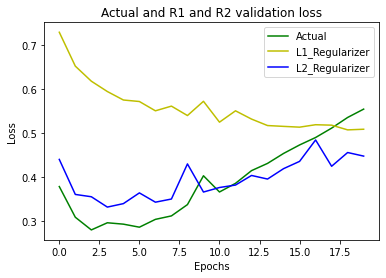

In [26]:
# Plotting the accuracy for Actual(Validation Loss), L1 and L2  Regularizer
loss_Actual = Original.history['val_loss']
loss_L1_Regularizer = L1_Regularizer.history['val_loss']
loss_L2_Regularizer = L2_Regularizer.history['val_loss']
epochs = range(0,20)
plt.plot(epochs, loss_Actual, 'g', label='Actual')
plt.plot(epochs, loss_L1_Regularizer, 'y', label='L1_Regularizer')
plt.plot(epochs, loss_L2_Regularizer, 'b', label='L2_Regularizer')
plt.title('Actual and R1 and R2 validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [19]:
# Creating a model to check the validation loss for Dropout technique
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Dropout=model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 2s 56ms/step - loss: 0.6421 - accuracy: 0.6281 - val_loss: 0.5562 - val_accuracy: 0.8368
Epoch 2/20
30/30 [==============================] - 1s 46ms/step - loss: 0.5361 - accuracy: 0.7631 - val_loss: 0.4513 - val_accuracy: 0.8594
Epoch 3/20
30/30 [==============================] - 2s 60ms/step - loss: 0.4565 - accuracy: 0.8211 - val_loss: 0.3873 - val_accuracy: 0.8774
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.3978 - accuracy: 0.8555 - val_loss: 0.3517 - val_accuracy: 0.8773
Epoch 5/20
30/30 [==============================] - 1s 33ms/step - loss: 0.3551 - accuracy: 0.8774 - val_loss: 0.3195 - val_accuracy: 0.8826
Epoch 6/20
30/30 [==============================] - 1s 32ms/step - loss: 0.3144 - accuracy: 0.8945 - val_loss: 0.2903 - val_accuracy: 0.8925
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2884 - accuracy: 0.9091 - val_loss: 0.2827 - val_accuracy: 0.8868
Epoch 8/20
30

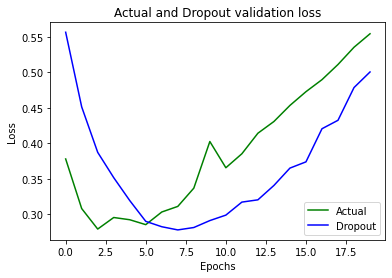

In [25]:
# Plotting the accuracy for Actual(Validation Loss) and Dropout technnique
loss_Actual = Original.history['val_loss']
loss_Dropout = Dropout.history['val_loss']
epochs = range(0,20)
plt.plot(epochs, loss_Actual, 'g', label='Actual')
plt.plot(epochs, loss_Dropout, 'b', label='Dropout')
plt.title('Actual and Dropout validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()